In [36]:
# The following is necessary to run the cells that follow. Run this cell once at the beginning, then not again.
%load_ext autoreload
# Changes made to .py files are reflected here
%autoreload 2       
# Reload all modules every time before executing the Python code typed.
import sys         # used for path appending
import matplotlib.pyplot as plt # used for plotting
sys.path.append("../../") # / directory
sys.path.append("../")  # /src/ directory
plt.rcParams["figure.figsize"] = [12, 7] #  Size of figures created from plots by default [12,7]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# A gc_event_dataframe has the following columns
> ## DateTime

> ## TimeFromStart_seconds

> ## EventType

> ## EventName

> ## AdditionalEventInfo

> ## MemoryChange_MB

> ## Duration_miliseconds

In [37]:

                        # Fill in the following 3 variables
################################################################################################
# filespaths = [
# "/Users/ellisbrown/Desktop/Project/cassandra-data/workloads/jdk11+g1+max25/gc.log* csv",
# "/Users/ellisbrown/Desktop/Project/cassandra-data/workloads/jdk11+g1/gc.log*",
# "/Users/ellisbrown/Desktop/Project/cassandra-data/workloads/jdk11+cms/gc.log*",
# "/Users/ellisbrown/Desktop/Project/cassandra-data/workloads/jdk11+par/gc.log*" ]
# files = []
# labels = ["jdk11 g1 max 25", "jdk11 g1", "jdk11 cms", "jdk 11 parallel gc"]
filepaths = ["/Users/ellisbrown/Desktop/Project/cassandra-data/workloads/jdk11+cms/gc.log*",
            #  "/Users/ellisbrown/Desktop/Project/cassandra-data/workloads/jdk11+g1/gc.log*",
            #  "/Users/ellisbrown/Desktop/Project/cassandra-data/workloads/jdk11+g1+max25/gc.log*",
            #  "/Users/ellisbrown/Desktop/Project/cassandra-data/workloads/jdk11+shen/gc.log*",
            # "/Users/ellisbrown/Desktop/Project/cassandra-data/workloads/jdk11+par/gc.log*", 
             
             "/Users/ellisbrown/Desktop/Project/cassandra-data/workloads/jdk16+par/gc.log*", 
             "/Users/ellisbrown/Desktop/Project/cassandra-data/workloads/jdk16+zgc/gc.log*",
             "/Users/ellisbrown/Desktop/Project/cassandra-data/workloads/jdk16+g1+max25/gc.log*",
             "/Users/ellisbrown/Desktop/Project/cassandra-data/workloads/jdk16+shen/gc.log*"]
files= []
labels = ["JDK11 cms",
 # "JDK11 PAR",  "JDK11 cms", "JDK11 g1", "JDK11 g1 Max25", "JDK11 Shen",
 "JDK16 PAR", "JDK16 ZGC", "JDK16 g1 max 25", "JDK16 Shen"]
# time_range_seconds = [0, 100]
time_range_seconds = None  # includes full log
################################################################################################
from src.read_log_file import get_parsed_comparions_from_files, get_file_names_wildcard
for filepath in filepaths:
    files.append(get_file_names_wildcard(filepath))

# Create a list data structure, with each item in the list being a gc_event_dataframe.
gc_event_dataframes = get_parsed_comparions_from_files(files, time_range_seconds,  ignore_crashes=False)


################################## OPTIONAl ############################################

# Import any CSV files that you would like.
csv_files_to_import = ["/Users/ellisbrown/Desktop/Project/cassandra-data/workloads/jdk11+cms/workloadhdrlog.csv",
                        # "/Users/ellisbrown/Desktop/Project/cassandra-data/workloads/jdk11+par/workloadhdrlog.csv", 
                        #          "/Users/ellisbrown/Desktop/Project/cassandra-data/workloads/jdk11+cms/workloadhdrlog.csv",
                        #          "/Users/ellisbrown/Desktop/Project/cassandra-data/workloads/jdk11+g1/workloadhdrlog.csv",
                        #          "/Users/ellisbrown/Desktop/Project/cassandra-data/workloads/jdk11+g1+max25/workloadhdrlog.csv",
                        #          "/Users/ellisbrown/Desktop/Project/cassandra-data/workloads/jdk11+shen/workloadhdrlog.csv",
             
             "/Users/ellisbrown/Desktop/Project/cassandra-data/workloads/jdk16+par/workloadhdrlog.csv", 
             "/Users/ellisbrown/Desktop/Project/cassandra-data/workloads/jdk16+zgc/workloadhdrlog.csv",
             "/Users/ellisbrown/Desktop/Project/cassandra-data/workloads/jdk16+g1+max25/workloadhdrlog.csv",
             "/Users/ellisbrown/Desktop/Project/cassandra-data/workloads/jdk16+shen/workloadhdrlog.csv"]
              # Populate this with CSV files.
csv_file_labels = ["JDK11 cms csv",
# "JDK11 PAR csv",  "JDK11 g1 csv", "JDK11 g1 Max25 csv", "JDK11 Shen csv", 
"JDK16 PAR csv", "JDK16 ZGC csv", "JDK16 g1 max 25 csv", "JDK16 Shen csv"]

import os.path


################################################################################################

import pandas as pd
for csv_file, label in zip(csv_files_to_import, csv_file_labels):
    if os.path.isfile(csv_file):
        print(len(labels))
        df = pd.read_csv(csv_file)
        gc_event_dataframes.append(df)
        labels.append(label)
    else:
        print("Error: Unable to find file " + csv_file)
if len(gc_event_dataframes) != len(labels):
    print("Error: Labels do not have same length as collected data")



Unable to parse file /Users/ellisbrown/Desktop/Project/cassandra-data/workloads/jdk11+cms/gc.log.6
Unable to parse file /Users/ellisbrown/Desktop/Project/cassandra-data/workloads/jdk11+cms/gc.log.1
Unable to parse file /Users/ellisbrown/Desktop/Project/cassandra-data/workloads/jdk11+cms/gc.log.8
Unable to parse file /Users/ellisbrown/Desktop/Project/cassandra-data/workloads/jdk11+cms/gc.log.9
Unable to parse file /Users/ellisbrown/Desktop/Project/cassandra-data/workloads/jdk11+cms/gc.log.0
Unable to parse file /Users/ellisbrown/Desktop/Project/cassandra-data/workloads/jdk11+cms/gc.log.7
Unable to parse file /Users/ellisbrown/Desktop/Project/cassandra-data/workloads/jdk11+cms/gc.log.5
Unable to parse file /Users/ellisbrown/Desktop/Project/cassandra-data/workloads/jdk11+cms/gc.log.4
Unable to parse file /Users/ellisbrown/Desktop/Project/cassandra-data/workloads/jdk11+cms/gc.log.3
5
6
7
8
9


In [38]:
zgc_index = 2
zgc_df = gc_event_dataframes[zgc_index]
# Transform safepoint data in the columns

for index in range(len(list(zgc_df["EventType"]))):
    if zgc_df["EventType"].iloc[index] == "Safepoint":
        zgc_df["EventType"].iloc[index] = "Pause"
    if zgc_df["AtSafepoint_ns"].iloc[index]:
        # Converts from nanoseconds to miliseconds , by dividing by 1x10^(6)
        zgc_df["Duration_miliseconds"].iloc[index] = zgc_df["AtSafepoint_ns"].iloc[index] / 1000000
    if zgc_df["SafepointName"].iloc[index]:
        zgc_df["EventName"] = zgc_df["SafepointName"]
print(zgc_df)

                         DateTime TimeFromStart_seconds           EventType  \
0    2021-07-19T13:32:13.428+0000                 2.506               Pause   
1    2021-07-19T13:32:13.834+0000                 2.912               Pause   
2    2021-07-19T13:32:14.048+0000                 3.127               Pause   
3    2021-07-19T13:32:14.060+0000                 3.138               Pause   
4    2021-07-19T13:32:14.062+0000                  3.14               Pause   
..                            ...                   ...                 ...   
671  2021-07-19T13:41:34.056+0000               563.134  Garbage Collection   
672  2021-07-19T13:41:38.028+0000               567.106               Pause   
673  2021-07-19T13:41:42.028+0000               571.106               Pause   
674  2021-07-19T13:41:45.028+0000               574.107               Pause   
675  2021-07-19T13:41:47.029+0000               576.107               Pause   

                          EventName AdditionalEvent

## Compare STW pauses during runtime

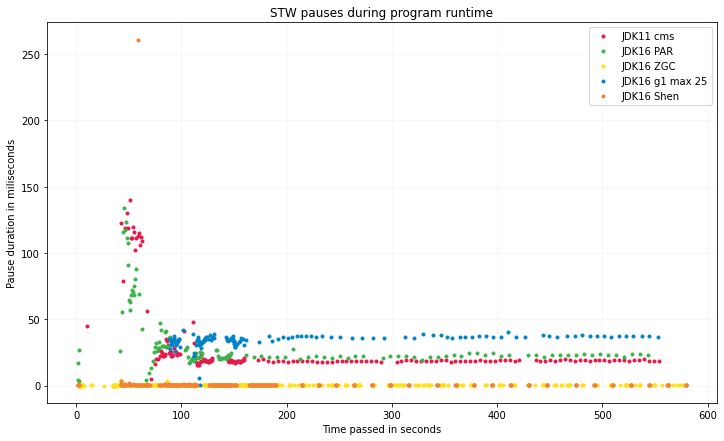

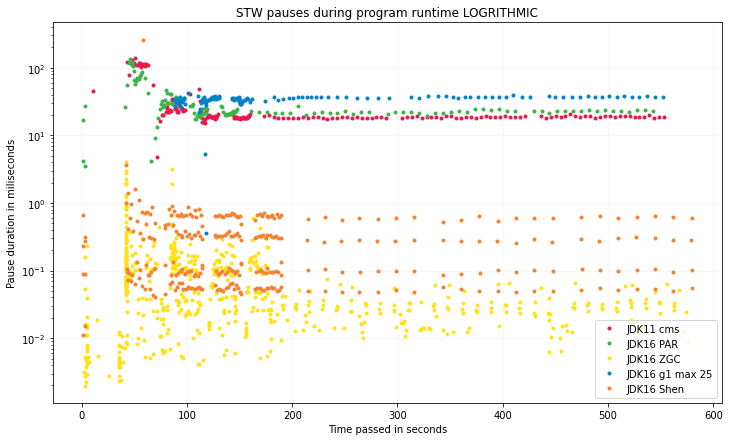

In [39]:
from plotting import plot_scatter

# Chart #1, linear Y axis

# Create a filter that will only take rows from a gc_event_dataframe that represent Pauses.
def pauses_only(row):
    if "EventType" in row:
        if row["EventType"] == "Pause":
            return True
    return False 
pauses_only = [pauses_only]
# Apply the filter, and create a plot
plot = plot_scatter(gc_event_dataframes, 
                    filter_by = pauses_only,
                    labels=labels)
# Set the style and details on the plot
_ = plot.set_title("STW pauses during program runtime")
plot.set_xlabel("Time passed in seconds")
plot.set_ylabel("Pause duration in miliseconds")
# The alpha value makes the grid harder to see.9
plot.grid(alpha = 0.1)

############################################################################################################
# Chart #2, logarithmic Y axis
plot = plot_scatter(gc_event_dataframes, filter_by = pauses_only, labels = labels)
plot.set_yscale("log") # LOGRITHMIC log set, using already plotted values
_ = plot.set_title("STW pauses during program runtime LOGRITHMIC")
plot.set_xlabel("Time passed in seconds")
plot.set_ylabel("Pause duration in miliseconds")
plot.grid(alpha = 0.1)



## Pauses by name during runtime

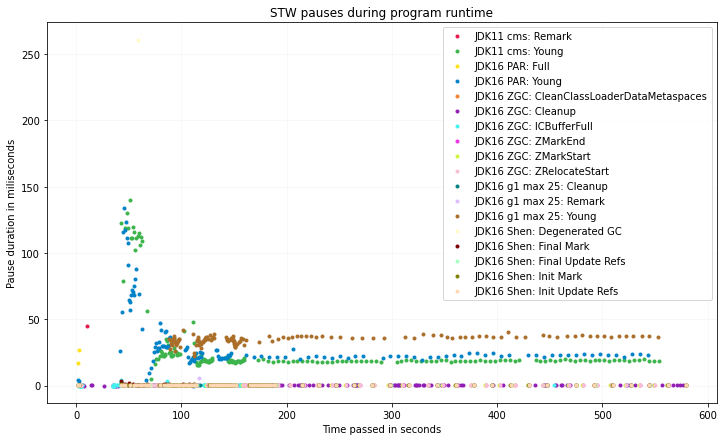

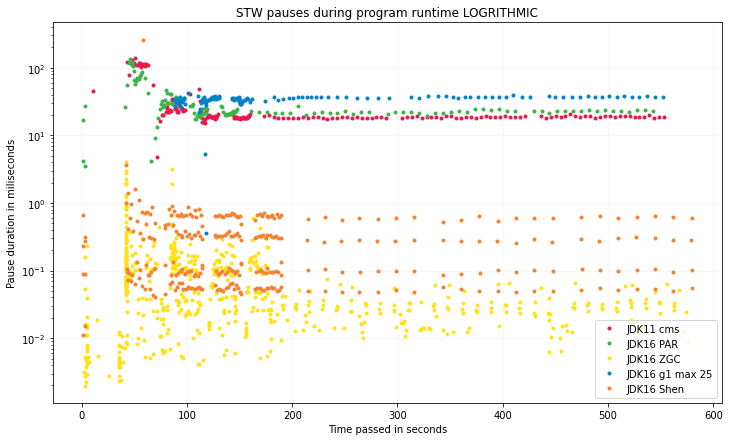

In [40]:
from plotting import plot_scatter

# Chart #1, linear Y axis

# Create a filter that will only take rows from a gc_event_dataframe that represent Pauses.

def pauses_only(row):
    if "EventType" in row:
        if row["EventType"] == "Pause":
            return True
    return False 
pauses_only = [pauses_only]

# Apply the filter, and create a plot
plot = plot_scatter(gc_event_dataframes,
                    filter_by = pauses_only, 
                    labels=labels, 
                    group_by = "EventName")

# Set the style and details on the plot
_ = plot.set_title("STW pauses during program runtime")
plot.set_xlabel("Time passed in seconds")
plot.set_ylabel("Pause duration in miliseconds")
# The alpha value makes the grid harder to see.9
plot.grid(alpha = 0.1)
############################################################################################################
# Chart #2, logarithmic Y axis
plot = plot_scatter(gc_event_dataframes, filter_by = pauses_only, labels = labels)
plot.set_yscale("log") # LOGRITHMIC log set, using already plotted values
_ = plot.set_title("STW pauses during program runtime LOGRITHMIC")
plot.set_xlabel("Time passed in seconds")
plot.set_ylabel("Pause duration in miliseconds")
plot.grid(alpha = 0.1)



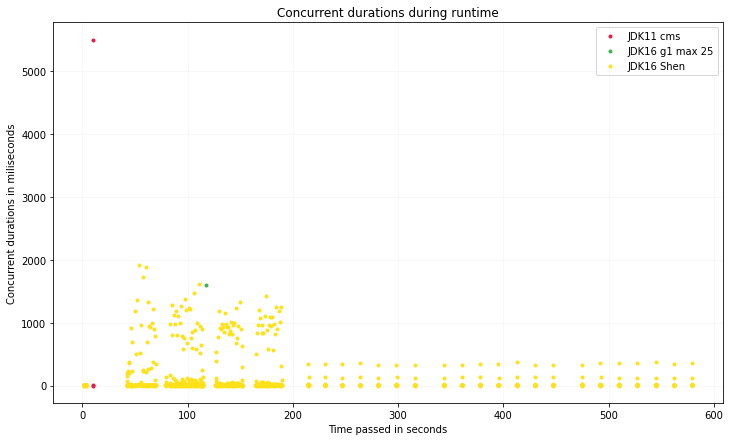

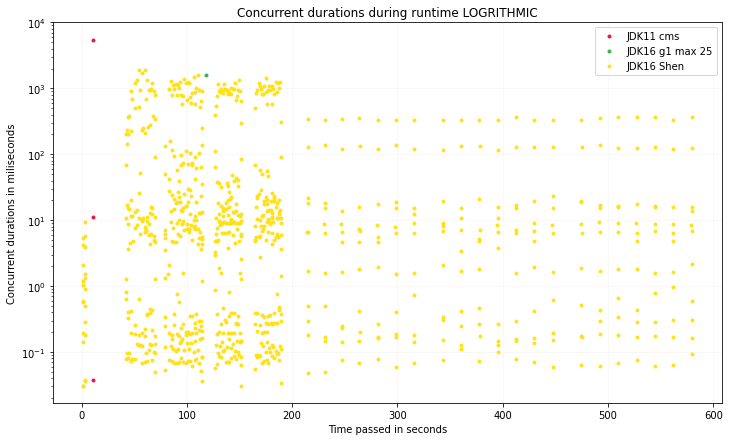

In [41]:
from plotting import plot_scatter

# Linear graph
def concurrent_only(row):
    if "EventType" in row:
        if row["EventType"] == "Concurrent":
            
            return True
    return False
concurrent_only = [concurrent_only]
plot = plot_scatter(gc_event_dataframes, labels=labels, filter_by= concurrent_only)
_ = plot.set_title("Concurrent durations during runtime")
plot.set_xlabel("Time passed in seconds")
plot.set_ylabel("Concurrent durations in miliseconds")
plot.grid(alpha = 0.1)

# Logarithmic graph
plot = plot_scatter(gc_event_dataframes, labels=labels, filter_by= concurrent_only)
plot.set_yscale("log")
_ = plot.set_title("Concurrent durations during runtime LOGRITHMIC")
plot.set_xlabel("Time passed in seconds")
plot.set_ylabel("Concurrent durations in miliseconds")
plot.grid(alpha = 0.1)


## Time spent in STW vs. Concurrent

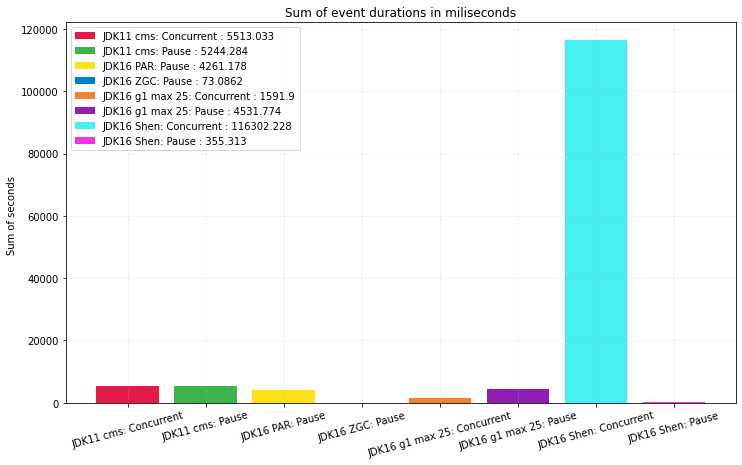

In [42]:
from plotting import plot_bar_sum

log = False # Set to True to view log bar graph as well
def duration_present(row):
    if "Duration_miliseconds" in row:
        if row["Duration_miliseconds"]:
            return True
    return False
duration_present = [duration_present]
# The grouping by eventtype means that every matching event name lives in one group. 
# Example: "Concurrent" events are a group, and "Pause" events are a group
plot = plot_bar_sum(gc_event_dataframes, group_by = "EventType", filter_by = duration_present, labels= labels)
_ = plot.set_title("Sum of event durations in miliseconds")
_ = plot.set_ylabel("Sum of seconds ")
_ = plt.xticks(rotation = 15)
plot.grid(alpha = 0.2)
if log:
    plot = plot_bar_sum(gc_event_dataframes, group_by = "EventType", filter_by = duration_present, labels= labels)
    _ = plot.set_title("Sum of event durations in miliseconds, LOGARITHMIC")
    _ = plot.set_ylabel("Sum of seconds ")
    plot.set_yscale("log") # LOGRITHMIC log set, using already plotted values
    plot.grid(alpha = 0.2)
    _ = plt.xticks(rotation = 15)



## Comparing Trends within the data

In [43]:
from plotting import plot_trends


def pauses_only(row):
       if "EventType" in row:
              if row["EventType"] == "Pause":
                     return True
       return False
pauses_only = [pauses_only]


print("\t\t\tPauses during runtime\n------------------------------------------------------------------------------------------------------------------")
plot_trends(gc_event_dataframes, 
       filter_by = pauses_only,
       labels= labels,
       throughput=True)
print("\n")

print("\t\t\tPauses by name during runtime\n------------------------------------------------------------------------------------------------------------------")
plot_trends(gc_event_dataframes, 
       group_by = "EventName",
       filter_by = pauses_only,
       labels= labels)


			Pauses during runtime
------------------------------------------------------------------------------------------------------------------
  Trends (ms)   | Event Count   | Max Duration  | Sum Duration  | Mean Duration | Std Dev.      | Throughput    |
-----------------------------------------------------------------------------------------------------------------
JDK11 cms       |  178.0000     |  139.9610     | 5244.2840     |   29.4623     |   28.1834     |   99.0500     % 
JDK16 PAR       |  130.0000     |  133.5780     | 4261.1780     |   32.7783     |   24.5419     |   99.2200     % 
JDK16 ZGC       |  585.0000     |    4.0142     |   73.0862     |    0.1249     |    0.3373     |   99.9900     % 
JDK16 g1 max 25 |  132.0000     |   41.9090     | 4531.7740     |   34.3316     |    4.9274     |   97.0800     % 
JDK16 Shen      |  312.0000     |  260.9410     |  355.3130     |    1.1388     |   14.7357     |   99.9400     % 


			Pauses by name during runtime
----------------------

## Percentiles of event durations

In [44]:
from plotting import plot_percentiles

def pauses_only(row):
       if "EventType" in row:
              if row["EventType"] == "Pause":
                     return True
       return False
pauses_only = [pauses_only]

print("\t\t\tPauses during runtime\n----------------------------------------------------------------------------------")
plot_percentiles(gc_event_dataframes, 
       filter_by = pauses_only,
       labels= labels)

print("\n\n")

print("\t\t\tPauses during runtime by name\n----------------------------------------------------------------------------------")
plot_percentiles(gc_event_dataframes, 
       group_by = "EventName",
       filter_by= pauses_only,
       labels= labels)
       

			Pauses during runtime
----------------------------------------------------------------------------------
Legend (All timing in miliseconds) : 
A | JDK11 cms
B | JDK16 PAR
C | JDK16 ZGC
D | JDK16 g1 max 25
E | JDK16 Shen
-------------------------------------------------------------------------------------------------
    | 50%       | 75%       | 90%       | 95%       | 99%       | 99.9%     | 99.99%    | 
------------------------------------------------------------------------------------------------
A   |   18.9335 |   22.6820 |   50.4192 |  112.0748 |  124.2307 |  138.2568 |  139.7906 | 
B   |   23.1125 |   29.6690 |   68.3226 |   89.2982 |  121.5520 |  132.2465 |  133.4448 | 
C   |    0.0388 |    0.1158 |    0.2193 |    0.3276 |    1.9167 |    3.5288 |    3.9656 | 
D   |   35.6110 |   36.9210 |   37.4443 |   37.7887 |   39.6466 |   41.6723 |   41.8853 | 
E   |    0.2470 |    0.5155 |    0.6580 |    0.7144 |    1.3563 |  180.9397 |  252.9409 | 



			Pauses during runtime by name


## Mean durations in miliseconds, pauses

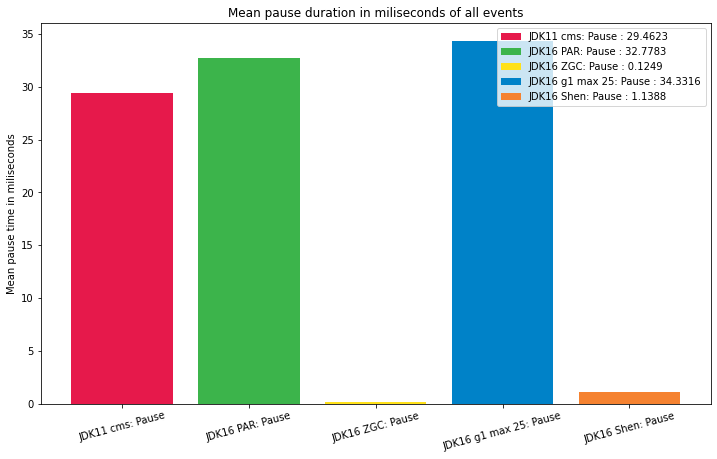

In [45]:

from plotting import plot_bar_avg

def pauses_only(row):
    if "EventType" in row:
        if row["EventType"] == "Pause":
            return True
    return False 
pauses_only = [pauses_only]

graph = plot_bar_avg(gc_event_dataframes, group_by = "EventType", filter_by = pauses_only, labels = labels)
_ = graph.set_title("Mean pause duration in miliseconds of all events")
_ = graph.set_ylabel("Mean pause time in miliseconds")
_ = plt.xticks(rotation = 15)

## Heap allocation used before & after GC

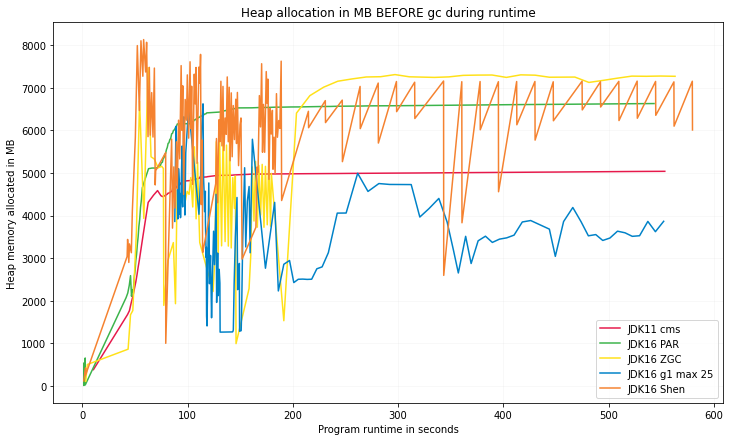

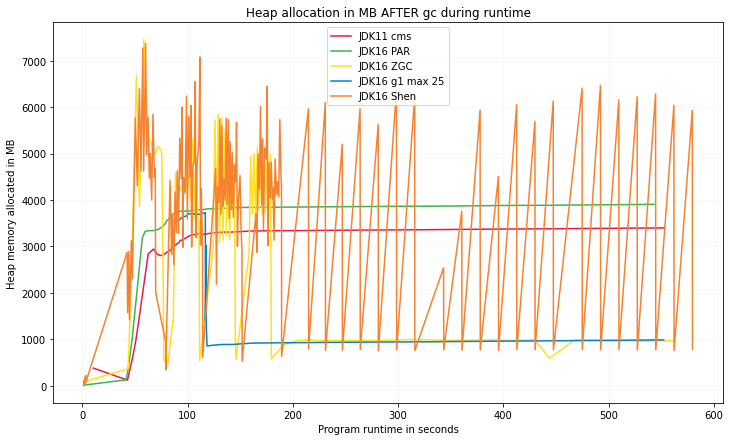

In [46]:
from plotting import plot_line

for df in gc_event_dataframes:
    if "TimeFromStart_seconds" in df:
        df.sort_values(by="TimeFromStart_seconds", axis=0,inplace=True)

def heap_before_gc(row):
    if "HeapBeforeGC" in row:
        if row["HeapBeforeGC"]:
            return True
    return False

heap_before_gc = [heap_before_gc]
plot = plot_line(gc_event_dataframes,
            group_by = None, 
            filter_by = heap_before_gc, # Confirm that this column has data for every row
            labels = labels,
            column = "HeapBeforeGC")

_ = plot.set_title("Heap allocation in MB BEFORE gc during runtime")
_ = plot.set_ylabel("Heap memory allocated in MB")
_ = plot.set_xlabel("Program runtime in seconds")
plot.grid(alpha = 0.1)

plot = plot_line(gc_event_dataframes,
            group_by = None, 
            filter_by = heap_before_gc,
            labels = labels,
            column = "HeapAfterGC" )
            #column_timing="DateTime")

_ = plot.set_title("Heap allocation in MB AFTER gc during runtime")
_ = plot.set_ylabel("Heap memory allocated in MB")
_ = plot.set_xlabel("Program runtime in seconds")

handles, labels = plot.get_legend_handles_labels()
plot.grid(alpha = 0.1)

## MB reclaimed during GC during runtime

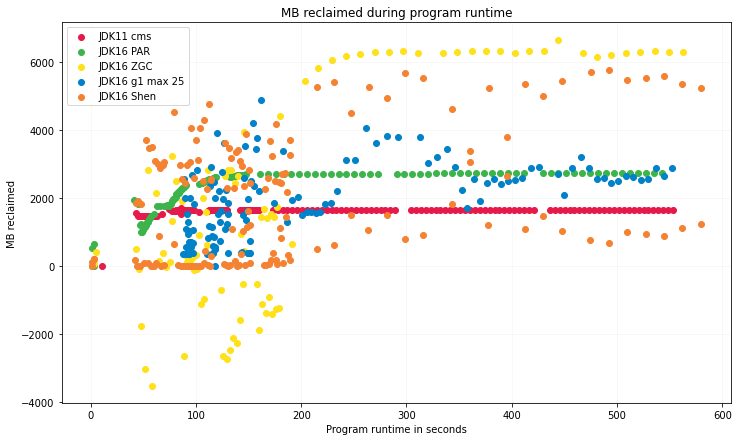

In [47]:
from plotting import plot_reclaimed_bytes

def gc_values_present(row):
    if "HeapBeforeGC" in row and "HeapAfterGC":
        if row["HeapBeforeGC"] != None and row["HeapAfterGC"] != None:
            return True
    return False

gc_values_present = [gc_values_present]

plot = plot_reclaimed_bytes(gc_event_dataframes, filter_by = gc_values_present, labels = labels)
_ = plot.set_title("MB reclaimed during program runtime")
_ = plot.set_ylabel("MB reclaimed")
_ = plot.set_xlabel("Program runtime in seconds")
plot.grid(alpha = 0.1)

## Heatmaps for each log

JDK11 cms Warning: At least one value lies outside of the provided time range. Max value outside range: 560.391
JDK11 cms Warning: At least one value lies outside the provided range for latency. Max value outside range: 5501.907
JDK16 PAR Warning: At least one value lies outside of the provided time range. Max value outside range: 543.182
JDK16 PAR Warning: At least one value lies outside the provided range for latency. Max value outside range: 133.578
JDK16 ZGC Warning: At least one value lies outside of the provided time range. Max value outside range: 576.107
JDK16 g1 max 25 Warning: At least one value lies outside of the provided time range. Max value outside range: 552.313
JDK16 g1 max 25 Warning: At least one value lies outside the provided range for latency. Max value outside range: 1591.9
JDK16 Shen Warning: At least one value lies outside of the provided time range. Max value outside range: 585.695
JDK16 Shen Warning: At least one value lies outside the provided range for late

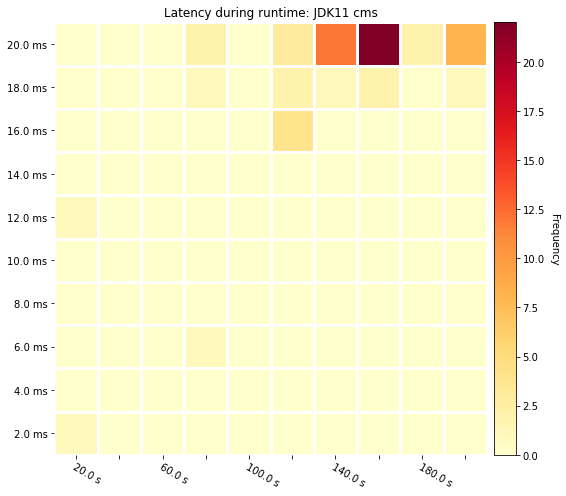

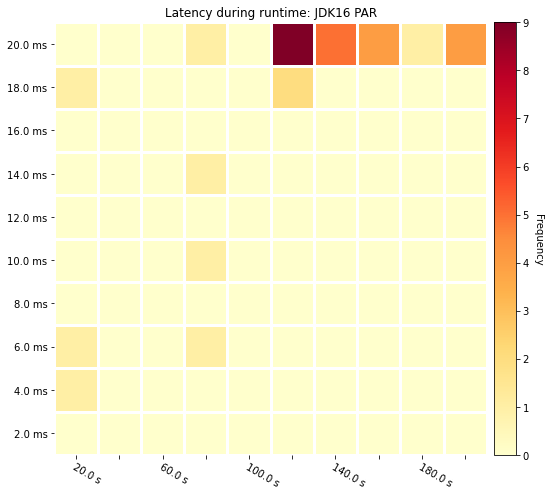

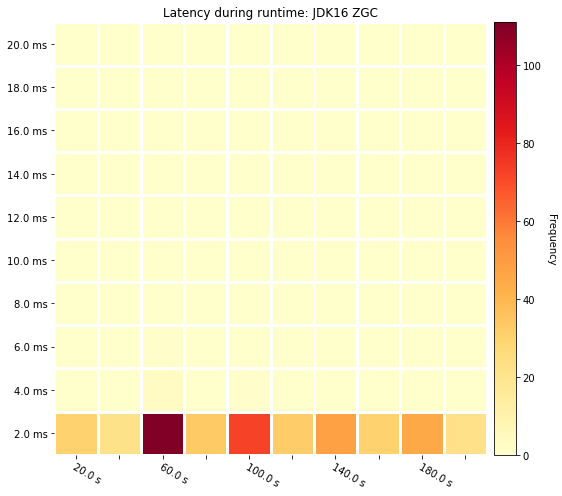

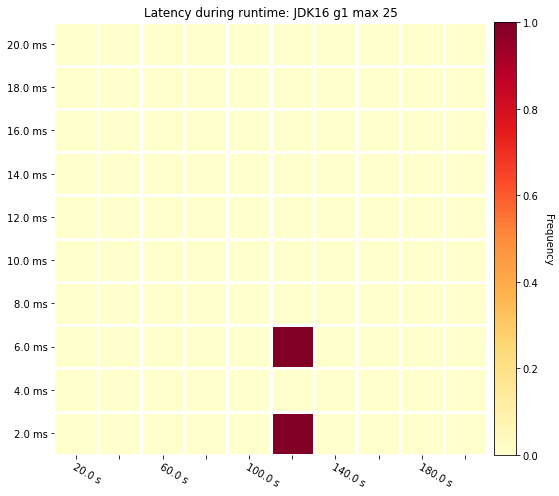

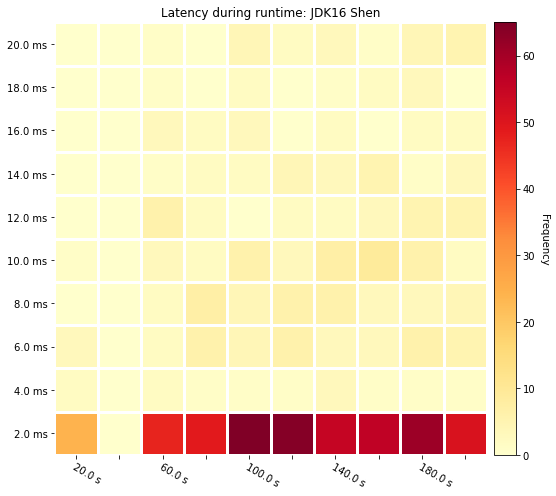

In [48]:
from src.graphing.heatmap import plot_heatmap, get_heatmap_data

for label, gc_event_dataframe in zip(labels, gc_event_dataframes):
    heatmap, dimensions = get_heatmap_data(gc_event_dataframe, 10,10, 20,2, label, True)     # Set the last value to FALSE to get warnings 
    if heatmap.size != 0 and dimensions:
        graph = plot_heatmap(heatmap, dimensions, False) # Set the last value to TRUE to see labels of frequency
        graph.set_title("Latency during runtime: " +  label)
        plt.rcParams["figure.figsize"] = [12, 7]


## Frequency of pauses histogram

In [49]:
from plotting2 import plot_frequency_intervals

# All intervals are in seconds
plot = plot_frequency_intervals(gc_event_dataframes,
# /src
                         filter_by = [(lambda row: row["EventType"] == "Pause"), (lambda row: row["Duration_miliseconds"] < 100)], 
                         interval_duration= 10, 
                         labels = labels)
_ = plt.xticks(rotation = 20)
plot.set_xlabel("Pauses time interval in seconds")
plot.set_ylabel("Frequency")
plot.set_title("Pause frequencies during full runtime")


KeyError: 'EventType'

Percentiles plotted:  [99.9, 90, 50]


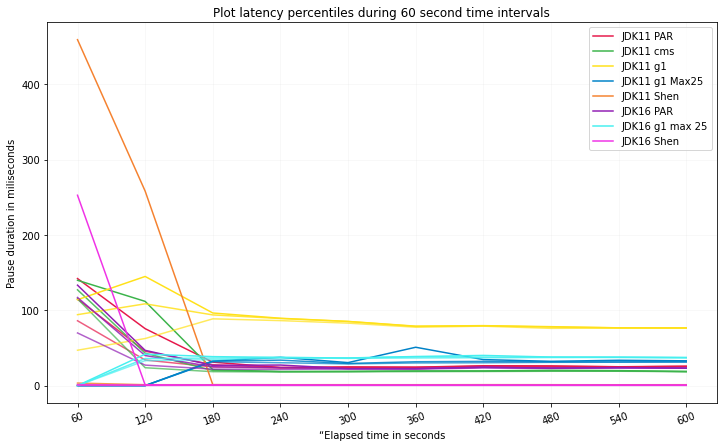

In [ ]:
from plotting2 import plot_percentile_intervals
interval_duration = 60
percentiles = [99.9, 90, 50]
plot = plot_percentile_intervals(gc_event_dataframes, 
                                filter_by = [(lambda row: row["EventType"] == "Pause")], 
                                interval_duration = interval_duration ,
                                labels = labels,
                                percentiles = percentiles )
plot.set_ylabel("Pause duration in miliseconds")
plot.set_xlabel("“Elapsed time in seconds")
plot.set_title("Plot latency percentiles during "+ str(interval_duration) + " second time intervals")
plot.grid(alpha = 0.1)
_ = plt.xticks(rotation = 20)
print("Percentiles plotted: ", percentiles)

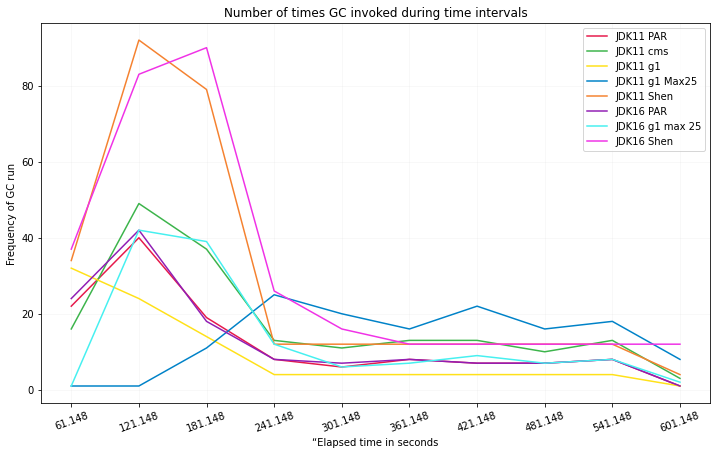

In [ ]:
from plotting2 import plot_frequency_of_gc_intervals

plot = plot_frequency_of_gc_intervals(gc_event_dataframes, 
                                      filter_by = [(lambda row: row["EventType"] == "Pause")], 
                                      interval_duration = 60 , 
                                      labels = labels)
plot.set_ylabel("Frequency of GC run")
plot.set_xlabel("“Elapsed time in seconds")
plot.set_title("Number of times GC invoked during time intervals")
plot.grid(alpha = 0.1)
_ = plt.xticks(rotation = 20)

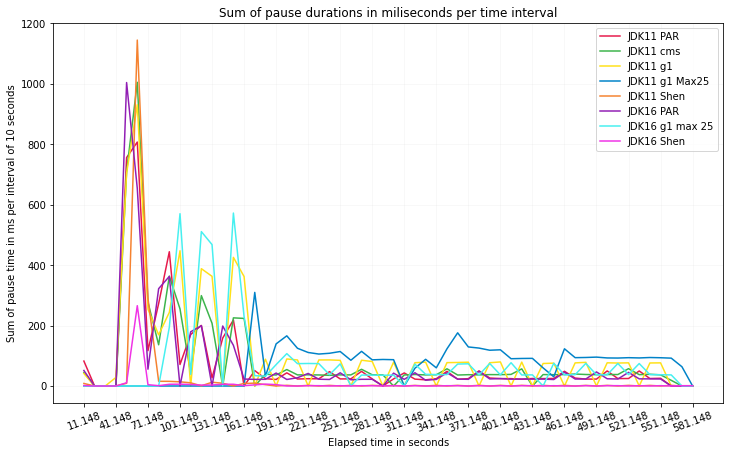

In [ ]:
from plotting2 import plot_sum_pause_intervals


interval_duration = 10
plot = plot_sum_pause_intervals(gc_event_dataframes,
                                filter_by = [(lambda row: row["EventType"] == "Pause")],
                                interval_duration = interval_duration, 
                                labels = labels)
_ = plot.set_title("Sum of pause durations in miliseconds per time interval")
plot.set_ylabel("Sum of pause time in ms per interval of " + str(interval_duration) + " seconds", )
plot.set_xlabel("Elapsed time in seconds")
plot.grid(alpha = 0.1)
_ = plt.xticks(rotation = 20)

## Here is an example using external data plotted.

       'AdditionalEventInfo', 'HeapBeforeGC', 'HeapAfterGC',
       'Duration_miliseconds'],
      dtype='object')


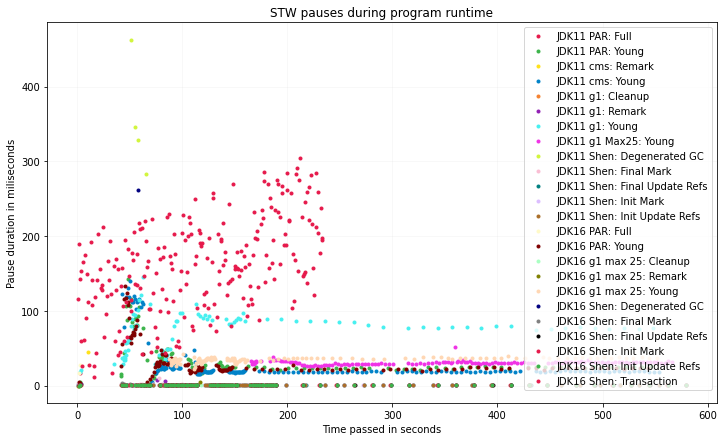

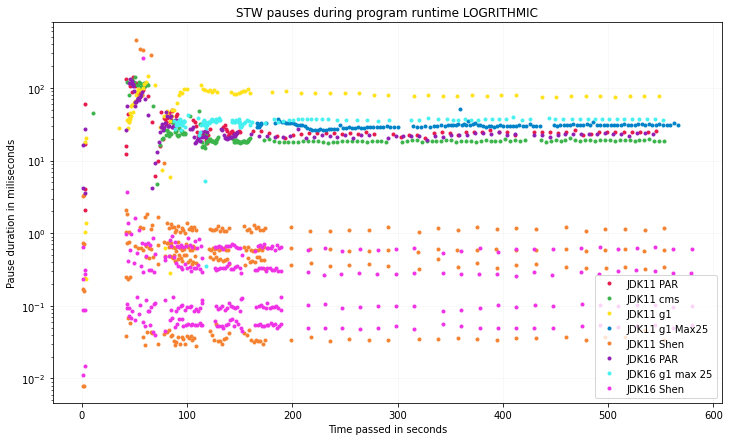

In [ ]:
from plotting import plot_scatter

# Chart #1, linear Y axis

# Create a filter that will only take rows from a gc_event_dataframe that represent Pauses.
pauses_and_transactions = [(lambda row : row["EventType"] == "Pause" or row["EventName"] == "Transaction")]
pauses_only =  [(lambda row : row["EventType"] == "Pause" )]
# Apply the filter, and create a plot
plot = plot_scatter(gc_event_dataframes, 
                    filter_by= pauses_and_transactions,
                    labels=labels,  
                    column= "Duration_miliseconds",
                    group_by = "EventName")
plot = plot_scatter([gc_event_dataframes[-1]], 
                    filter_by= pauses_and_transactions,
                    labels=[labels[-1]],  
                    column= "Duration_miliseconds",
                    column_timing="ExampleName",
                    group_by = "EventName",
                    plot=plot)


# Set the style and details on the plot
_ = plot.set_title("STW pauses during program runtime")
plot.set_xlabel("Time passed in seconds")
plot.set_ylabel("Pause duration in miliseconds")
# The alpha value makes the grid harder to see.9
plot.grid(alpha = 0.1)
############################################################################################################
# Chart #2, logarithmic Y axis
plot = plot_scatter(gc_event_dataframes, filter_by = pauses_only, labels = labels)
plot.set_yscale("log") # LOGRITHMIC log set, using already plotted values
_ = plot.set_title("STW pauses during program runtime LOGRITHMIC")
plot.set_xlabel("Time passed in seconds")
plot.set_ylabel("Pause duration in miliseconds")
plot.grid(alpha = 0.1)



## Specific comparison

Text(0.5, 1.0, 'Time spent at safepoints during runtime')

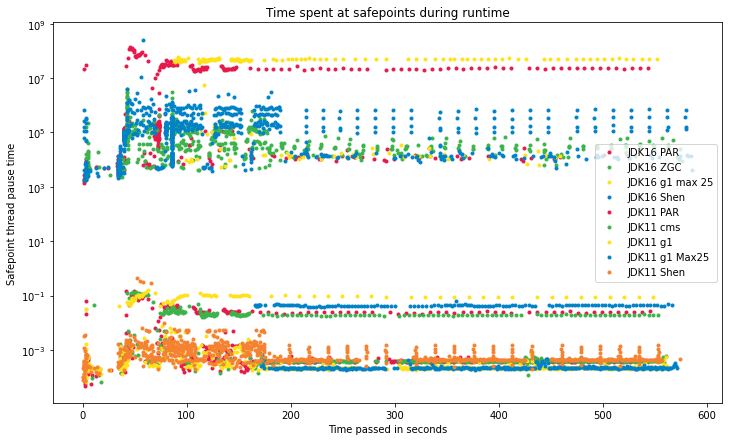

In [ ]:
def safepoints_JDK11(row):
    if "TotalApplicationThreadPauseTime_seconds" in row:
        if row["TotalApplicationThreadPauseTime_seconds"] != None:
            return True
    return False

def safepoints_JDK16(row):
    if "AtSafepoint_ns" in row:
        if row["AtSafepoint_ns"] != None:
            return True
    return False

plot = plot_scatter(gc_event_dataframes, column = "AtSafepoint_ns", labels=labels, filter_by = [safepoints_JDK16])
plot = plot_scatter(gc_event_dataframes, column = "TotalApplicationThreadPauseTime_seconds", labels=labels, plot = plot, filter_by = [safepoints_JDK11])
plot.set_yscale("log")
plot.set_ylabel("Safepoint thread pause time")
plot.set_xlabel("Time passed in seconds")
plot.set_title("Time spent at safepoints during runtime")

Text(0.5, 1.0, 'Throughput for the Cassandra workload')

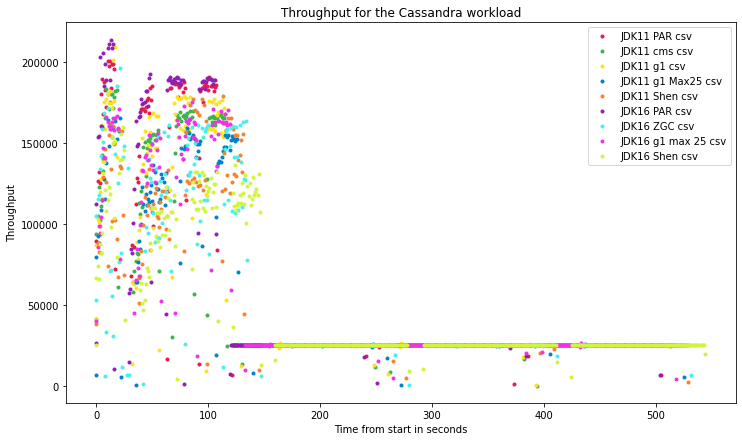

In [ ]:
### Compare the throughput data
plot = plot_scatter(gc_event_dataframes, column = "Throughput", column_timing = "Relative timestamp", labels = labels)
 # plot = plot_scatter(gc_event_dataframes, column = "Throughput", column_timing = "Relative timestamp", labels = labels, plot = plot)
plot.set_xlabel("Time from start in seconds")
plot.set_ylabel("Throughput")
plot.set_title("Throughput for the Cassandra workload")
